# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)

Bonus 2:  Who is your favorite Pokemon?

----

**Submit this file on Moodle on the submission link I will provide. This is due September 25 12nn.**

In [2]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [3]:
df = pd.read_csv("data/Pokemon.csv")

In [4]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


1.How many legendary pokemon are there? 

In [5]:
df.isLegendary[df.isLegendary==True].count()

46

2.Pokemon with highest attack to HP ratio? 

In [6]:
df = df.set_index('Name')
print("Pokemon with Highest attack-to-HP ratio: ", (df['Attack'] / df['HP']).idxmax())

Pokemon with Highest attack-to-HP ratio:  Shedinja


3.Binary classifier for whether pokemon are Fire type or not

In [7]:
df['isFire'] = (df['Type_1'] == 'Fire')
df['isFire']

Name
Bulbasaur     False
Ivysaur       False
Venusaur      False
Charmander     True
Charmeleon     True
              ...  
Yveltal       False
Zygarde       False
Diancie       False
Hoopa         False
Volcanion      True
Name: isFire, Length: 721, dtype: bool

4.Attributes and Stats of all Legendary Pokemon using boxplots

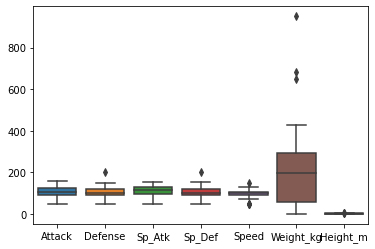

In [8]:
leggy = df[(df['isLegendary'] == True)]
leggy = leggy[['Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Weight_kg', 'Height_m']]
sb.boxplot(data=leggy)

5.Probabilities of a Pokemon being a fire type

In [26]:
samp = df[['Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Weight_kg', 'Height_m']]
logistic_model=LogisticRegression(class_weight='balanced')
logistic_model.fit(samp, df['isFire'])
predi = logistic_model.predict(samp)
logistic_model.coef_
df = df.reset_index()
df['Predictions'] = predi
proba = [x[1] for x in logistic_model.predict_proba(samp)]
df['Probability'] = proba
pog = df[['Name', 'isFire', 'Predictions', 'Probability']]
pog

,Name,isFire,Predictions,Probability
0,Bulbasaur,False,False,0.436427
1,Ivysaur,False,False,0.454643
2,Venusaur,False,False,0.446020
3,Charmander,True,False,0.497723
4,Charmeleon,True,True,0.523026
...,...,...,...,...
716,Yveltal,False,False,0.382393
717,Zygarde,False,False,0.069719
718,Diancie,False,False,0.159698
719,Hoopa,False,True,0.943377


6.Accuracy of the model

In [27]:
accuracy = metrics.accuracy_score(predi, df['isFire'])
accuracy

0.6962552011095701

7.Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(samp, df['isFire'], 
                                                    test_size=0.3, 
                                                    train_size=0.7, 
                                                    random_state=42)
logistic_model.fit(X_train, Y_train)
predi_train = logistic_model.predict(X_train)
predi_test = logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(predi_train, Y_train)
test_accuracy = metrics.accuracy_score(predi_test, Y_test)

print('Accuracy:', metrics.accuracy_score(Y_test, predi_test))
print('Precision:', metrics.precision_score(Y_test, predi_test))
print('Recall:', metrics.recall_score(Y_test, predi_test))

Accuracy: 0.7235023041474654
Precision: 0.125
Recall: 0.6666666666666666


In [36]:
samp = pd.concat([X_train, Y_train], axis = 1)
non_fire = samp[samp.isFire == False]
yes_fire = samp[samp.isFire == True]

fire_upsamp = resample(yes_fire,
                      replace = True,
                      n_samples = len(non_fire),
                      random_state=42)

fire_upsamp = pd.concat([non_fire, fire_upsamp])
fire_upsamp.isFire.value_counts()
X_train

,Attack,Defense,Sp_Atk,Sp_Def,Weight_kg,Height_m
104,80,110,50,80,45.0,0.99
114,95,80,40,80,80.0,2.21
647,77,77,128,128,6.5,0.61
425,80,44,90,54,15.0,1.19
676,48,54,63,60,3.5,0.30
...,...,...,...,...,...,...
249,130,90,110,154,199.0,3.81
156,84,78,109,85,79.5,1.70
36,41,40,50,65,9.9,0.61
321,60,40,65,45,24.0,0.71


In [37]:
logistic_model2 = LogisticRegression(class_weight = 'balanced', solver = 'liblinear')
Y_train = fire_upsamp.isFire
X_train = fire_upsamp.drop('isFire', axis = 1 )
fire_upsamp = logistic_model2.fit(X_train, Y_train)
upsamp_predi = fire_upsamp.predict(X_test)

In [39]:
print('Accuracy:', metrics.accuracy_score(Y_test, upsamp_predi))
print('Precision:', metrics.precision_score(Y_test, upsamp_predi))
print('Recall:', metrics.recall_score(Y_test, upsamp_predi))

Accuracy: 0.7235023041474654
Precision: 0.11290322580645161
Recall: 0.5833333333333334


Bonus 1: 
Machine learning is the process of taking patterns and data and feeding them to a machine to make it familiar with the patterns and with enough data, be able to make "rational" decisions and learn from historical data that it has gathered. 

Pattern recognition is the process of looking at data in a way that patterns can be visualized for future references or other similar datasets. 

Bonus 2: Zangoose 